In [33]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import scipy as sp
import sklearn as skl

In [2]:
from numpy.random import uniform 

In [15]:
x = uniform(0,100, 30)  # 0에서 100사이에서 30개의 수를 고르게 뽑는다 

In [16]:
np.mean(x) # mean of x

50.79114431450619

In [23]:
ms = []
for i in range (50):
    x = uniform(0, 100, 30) #creating data x
    m = np.mean(x) # mean of x
    ms.append(m)

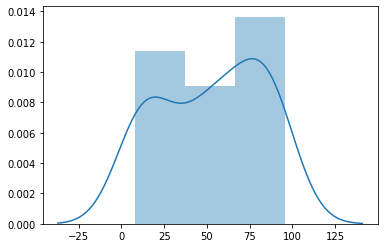

In [24]:
sns.distplot(x)

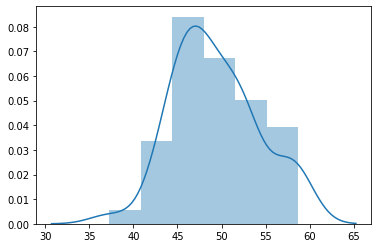

In [25]:
sns.distplot(ms) # sam

In [ ]:
# 95% 신뢰구간 구하기 

In [27]:
np.quantile(ms, 0.025) # bottom 2.5%

42.719770159607876

In [28]:
np.quantile(ms, 0.975) # top 2.5%

58.52753081291942

In [29]:
# 99% 신뢰구간 구하기 

In [30]:
np.quantile(ms, 0.005)

38.5696870979926

In [31]:
np.quantile(ms, 0.995)

58.65128956630052

In [41]:
cars = pd.read_csv("cars.csv")

In [42]:
np.mean(cars['speed'])

15.4

In [43]:
from sklearn.utils import resample

In [45]:
resample([3,4,5]) #pciking numbers randomly from samples to create resample

[5, 3, 3]

In [47]:
ms = []
for _ in range(100000):
    x = resample(cars['speed']) #re-sampling from the sample we already have
    m = np.mean(x) # mean
    ms.append(m) # adding to list

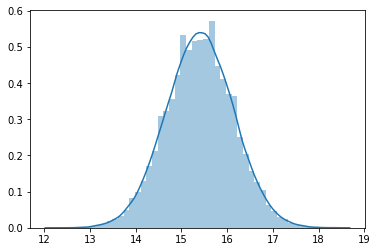

In [48]:
sns.distplot(ms)

In [49]:
np.quantile(ms, 0.025) # bottom 2.5%

13.94

In [50]:
np.quantile(ms, 0.975) # top 2.5%

16.84

# 실습

### cars의 dist컬럼의 중간값(median)을 구하고, 그 95% 신뢰구간을 구하기

In [57]:
ms = []
for _ in range(100000):
    x = resample(cars['dist']) #re-sampling from the sample we already have
    m = np.median(x) # mean
    ms.append(m) # adding to list

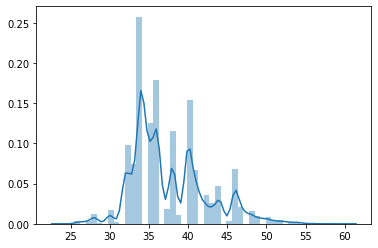

In [58]:
sns.distplot(ms)

In [59]:
np.quantile(ms, 0.025) # bottom 2.5%

30.0

In [60]:
np.quantile(ms, 0.975) # top 2.5%

49.0

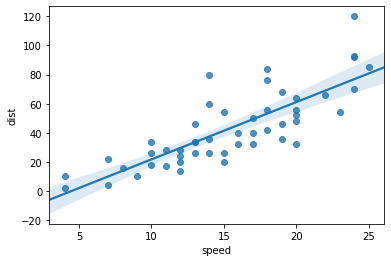

In [61]:
sns.regplot('speed', 'dist', cars)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
model = LinearRegression() # LinearRegression = 선형모형

In [71]:
x = cars[['speed']] #독립변수 
                    # 괄호가 2개인 이유:
                    # 1개일 때는 sequence (그냥 1줄로 쭉 늘어진 형태)
                    # 2개일때는 컬럼이 하나인 표가 됨
y = cars['dist']    #종속변수
model.fit(x,y)      #파라미터 추정

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
model.coef_ #계수(coefficient), 독립변수의 가중치 (ax+b에서 a에 해당)
            # fit이 된 후 나오는 값들에는 _가 들어가야함 

array([3.93240876])

In [70]:
model.intercept_ # 절편(ax+b에ㅓ b에해당)

-17.57909489051095

### 실습: 부트스트래핑으로 선형 모형의 파라미터의 95% 신뢰구간 구하기

In [84]:
coefs = []
intercepts = []
for _ in range(1000):
    df = resample(cars)
    model = LinearRegression()
    x = df[['speed']]
    y = df['dist'] 
    model.fit(x,y)
    a = model.coef_
    b = model.intercept_
    coefs.append(a), intercepts.append(b)

In [89]:
np.quantile(coefs, [0.025, 0.975])

array([3.13944656, 4.76124043])

In [90]:
np.quantile(intercepts, [0.025, 0.975]) 

array([-29.55155215,  -6.34580902])

In [91]:
# 데이터를 많이 모으면 신뢰구간이 줄어든다 

In [92]:
sample_size = 30

In [94]:
ms = []
for _ in range(1000):
    x = uniform(0, 100, sample_size)
    m = np.mean(x)
    ms.append(m)
np.quantile(ms, [.025, .0975])

array([39.42922804, 43.16742675])

In [95]:
sample_size = 100

In [96]:
ms = []
for _ in range(1000):
    x = uniform(0, 100, sample_size)
    m = np.mean(x)
    ms.append(m)
np.quantile(ms, [.025, .0975])

array([43.84516821, 45.76289851])

In [97]:
sample_size = 10000

In [98]:
ms = []
for _ in range(1000):
    x = uniform(0, 100, sample_size)
    m = np.mean(x)
    ms.append(m)
np.quantile(ms, [.025, .0975])

array([49.45588721, 49.64608665])

### 실습: sleep Data
#### group으로 extra를 예측하는 선형 모형을 만들고 각 파라미터의 신뢰구간 구하기


In [99]:
sleep = pd.read_csv('sleep.csv')

In [100]:
sleep.columns

Index(['Unnamed: 0', 'extra', 'group', 'ID'], dtype='object')

In [107]:
coef = []
intercepts = []
for _ in range (10000):
    df = resample(sleep)
    model = LinearRegression()
    x = df[['group']]
    y = df['extra']
    model.fit(x,y)
    a = model.coef_
    b = model.intercept_
    coefs.append(a), intercepts.append(b)

In [108]:
np.quantile(coefs, [0.025, 0.975])

array([-0.00770833,  4.09535277])

In [109]:
np.quantile(intercepts, [0.025, 0.975]) 

array([-3.26469697,  1.73450133])

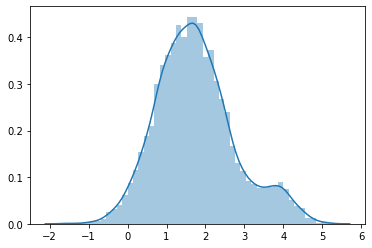

In [110]:
sns.distplot(coefs)

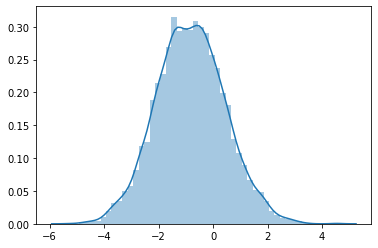

In [111]:
sns.distplot(intercepts)